#### ML01: A Machine Learning Basics

Now we've explored and understood some basic ML terms, let's see if we can put these into practice on a simple project!

To get things started we're going to be using a Python library called [Scikit-Learn](http://scikit-learn.org/stable/). Scikit-Learn (or SKL for short) is without a doubt the most popular library for basic MLin Python. There are a number of reasons for this, but for the most part it is very well designed, powerful yet easy to use and the available [documentation](http://scikit-learn.org/stable/documentation.html) and [tutorials](http://scikit-learn.org/stable/tutorial/index.html) are brilliant.

But before we get into the detail of SKL, it's important to understand that there's a specific process associated with performing Machine Learning as follows:

1. Load, explore & visualise the data.
2. Split into a training and a test set.
3. Choose the model (aka algorithm, process) and parameters used to fit the input to the outputs.
4. Fit this model to the input training data and output training data.
5. Use this model to predict the outputs to your test set.
6. Check how well the model fits the test data.

**Installation**

We can install SKL as follows:  
```pip install scikit-learn==0.19.2```
Note that the version of scikit-learn that we're using for this part of the course is 0.19.2 so we've specified the specific version in the `pip install` command. The SKL API can change quite significantly and there's no guarentee that subsequent versions will work with this version of the code.

**Data**  

We will need some data before we get started. Another great thing about SKL is that it has some good datasets to get us started. One particularly famous dataset we're going to use is the [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). You can see that step 1 is all about loading, exploring and visualising the data, so we'll need to import our go-to libraries for this alongside the dataset as follows:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data
from sklearn import datasets
iris = datasets.load_iris()         # SKL Dataset

In [2]:
pd.set_option('display.max_rows', 500)

If we take a look at the iris dataset, we can see that it's actually a custom SKL class called a Bunch:

In [3]:
type(iris)

sklearn.utils.Bunch

If we want to find out more about a Bunch we can ask Python and SKL for help, via the `help()` function:

In [4]:
help(iris)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Container object for datasets
 |  
 |  Dictionary-like object that exposes its keys as attributes.
 |  
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      __dir__() -> list
 |      default dir() implementation
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__


Whilst a bunch is great for using in SKL, it's less good for exploring and visualising, since this is easier in pandas, so we'll convert the data to a pandas dataframe for easier analysis:

In [26]:
# Creating a df
df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names
)
df['target'] = iris.target

# Decoding the class
iris_target_decodes = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

df_viz = df.replace({"target": iris_target_decodes})
df_viz.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


You'll see here that we have 4 numeric variables as follows:

* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)

These variables are our **features** or **predictors** and are the values upon which we'll train our ML algorithm to predict our **target**.

And a **target** variable with three values: *setosa*, *versicolor* and *virginica*. The target variable is what we want to predict using our **features**.



**Basic Data Exploration**

Now we're imported our data, we need to explore it. In reality we'd spend some time looking at things such as missing values, correlations, distribution etc. as these can all provide us with important information about the data and influence how we approach our ML task.

However since this is a quick example, with a very clean dataset, this is probably unnecessary and something we'll be exploring in the upcoming chapters anyway. However, we will go through some basic visualisation that you can do with Seaborn.

**Data Visualisation**

We'll start by using a [Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html). This will plot all the columns within the dataset against one another:

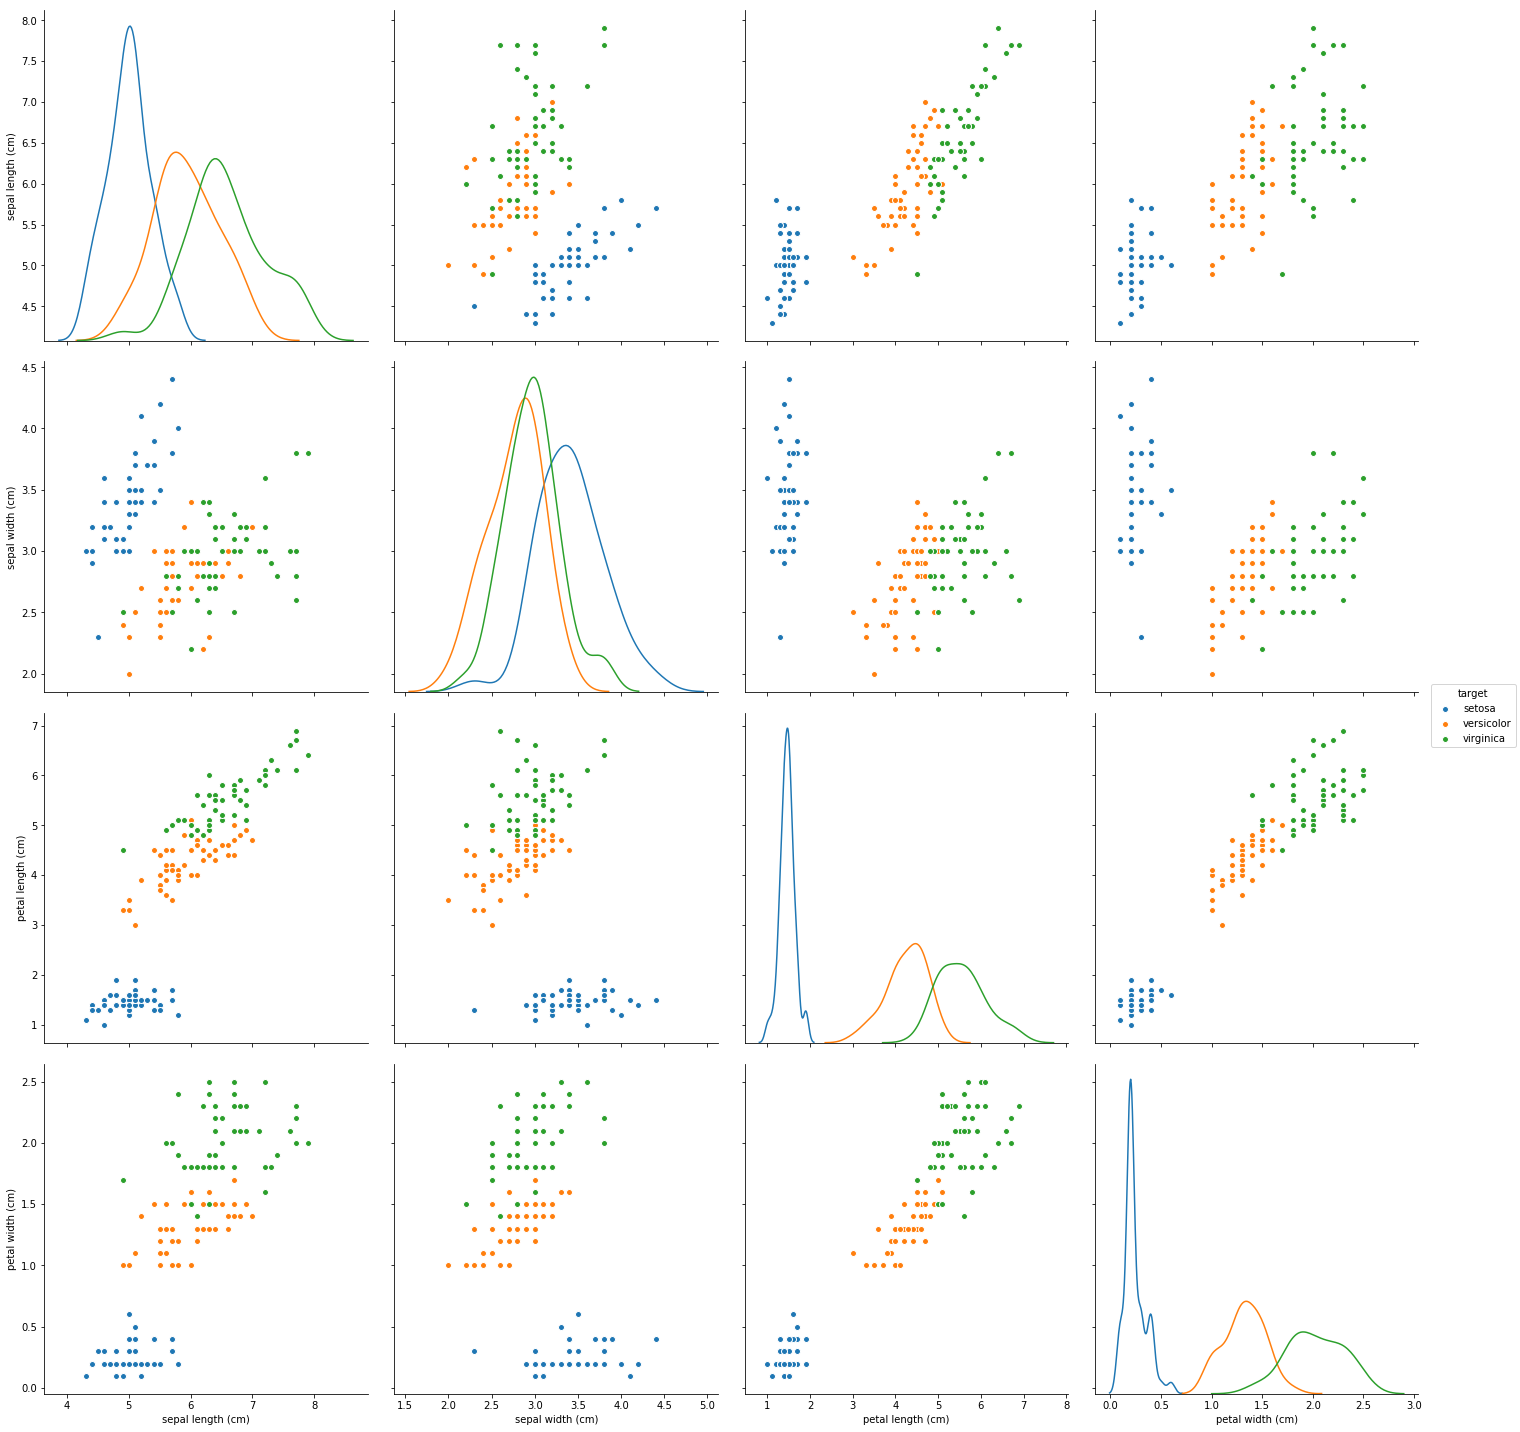

In [11]:
pairplot1 = sns.pairplot(
    data=df_viz, 
    hue="target",
    diag_kind='kde',
    size=5
)

You can see that the *setosa* values in blue is clearly separated in some of the charts but the versicolour and virginica values are not, although the *virginica* tends to have wider and longer petals and sepals than the *versicolour*. This means that there may be some scope for an ML algorithm to predict the flower type which is our **target** value in this case.

**Preparing the data for ML**

Before we can do any customisation or algorithm selection, we much first prepare the data. the first stage of this is splitting the dataset into **training** and **test** datasets. The training set will contain the known output (aka the **target** variable) which in this case, is the species of Iris. We'll be able to train our model on the training set before applying it to the test set. The test set will not contain the **target** variable and it's purpose is to see how well our algorithm performs.

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, 
    iris.target, 
    test_size=0.2, 
    random_state=42
)

Note that `train_test_split` can take a number of different types of input, including pandas dataframes, numpy arrays as well as lists. Here we're inputting the numpy arrays for `iris.data` and `iris.target` that we loaded earlier but it would have been just as easy to use a pandas dataframe so long as it's correctly formatted.

Let's go through what the `train_test_split` function is doing:

You'll see that we get four outputs from the train_test_split function: `X_train, X_test, y_train, y_test`. 

**X** (upper case) is the naming convention for the **features** matrix.  
**y** (lower case) is the naming convention for our **target** or **label**.

We have two datasets for each: **train** and **test**.

You'll also see that we're passing two positional arguments to our `train_test_split` function:  
* The first positional argument is for our **feature matrix (X)** which contains the values upon which we'll train our ML algorithm to predict our **target**.  
* The second positional argument is for our **target matrix (y)** which contains the **target** values we want to predict via applying an ML algorithm to our **features**.

Additionally we've specified two keyword arguments:
* `test_size` which is the proportion of data we want to set aside for our test dataset. As a general rule it's best to keep at least 20% of your data for testing purposes. 
* `random_state` which takes a single integer value. This provides a seed to the random number generator which splits the dataset and ensure that if we re-run our code we get exactly the same records in our train and test datasets.

**Choosing an Algorithm**

As with data exploration earlier, choosing the correct algorithm and refining and optimising it is where Machine Learning engineers really earn their money. We'll be going into more detail about algorithms later on in the course, but for now we'll start with a basic [Linear Regression](http://www.statisticssolutions.com/what-is-linear-regression/) algorithm.

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()   # Create a blank Logistic Regression Class object
model.fit(X_train, y_train)    # Train the model with the training set
model.score(X_test,y_test)     # Test the model against the actual values

0.9467245149351711

And voila!! We've just trained our first model.

#### Further Reading

[Intro to SKL](https://www.oreilly.com/ideas/intro-to-scikit-learn)  
[Train Test Split](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)  